# SARIMA and SARIMAX Models

## SARIMAX

## Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
So far the models we've looked at consider past values of a dataset and past errors to determine future trends, seasonality and forecasted values. We look now to models that encompass these non-seasonal (p,d,q) and seasonal (P,D,Q,m) factors, but introduce the idea that external factors (environmental, economic, etc.) can also influence a time series, and be used in forecasting.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html'>sarimax.SARIMAX</a></strong><font color=black>(endog[, exog, order, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html'>sarimax.SARIMAXResults</a></strong><font color=black>(model, params, …[, …])</font>&nbsp;&nbsp;Class to hold results from fitting a SARIMAX model.</tt>

In [140]:
import numpy as np
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error

In [141]:
df = pd.read_csv("RestaurantVisitors.csv", index_col= 0, parse_dates= True)

In [142]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [143]:
df.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29',
               '2017-05-30', '2017-05-31'],
              dtype='datetime64[ns]', name='date', length=517, freq=None)

In [144]:
df.index.freq = "D"

In [145]:
df.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29',
               '2017-05-30', '2017-05-31'],
              dtype='datetime64[ns]', name='date', length=517, freq='D')

In [146]:
df.shape

(517, 8)

In [147]:
df.isna().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [148]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [149]:
df.tail(40)

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-27,Thursday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-28,Friday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-29,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-30,Sunday,0,na,NaN,NaN,NaN,NaN,NaN


In [150]:
# Seems like all Null values are at bottom.
# So, we can drop them.

In [151]:
new_df = df.dropna()

In [152]:
new_df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [153]:
new_df.shape

(478, 8)

<AxesSubplot:xlabel='date'>

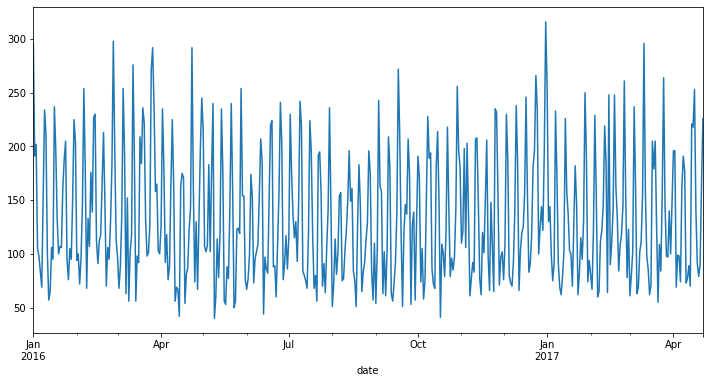

In [154]:
# Plotting Data:

new_df["total"].plot(figsize= (12,6))

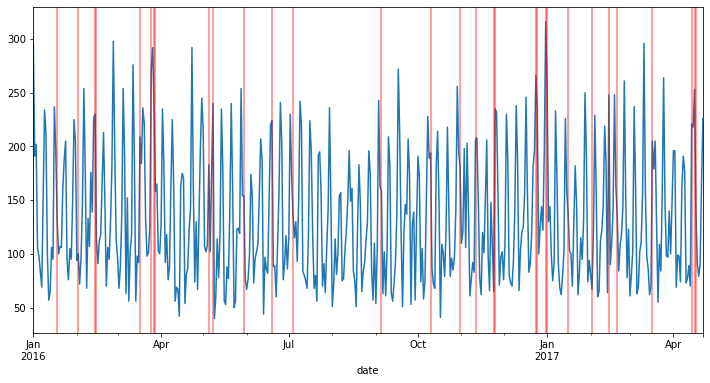

In [155]:
# Plotting Vertical Lines on Holidays to see if Total Peaks on Holidays:

ax= new_df["total"].plot(figsize= (12,6))

for ind in df[df["holiday"] == 1].index:
    ax.axvline(x= ind, color= "red", alpha= 0.5)

### ETS Decomposition:

In [156]:
decomp = seasonal_decompose(new_df["total"], model= "additive")

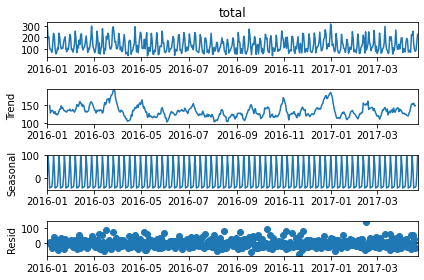

In [157]:
decomp.plot();

<AxesSubplot:xlabel='date'>

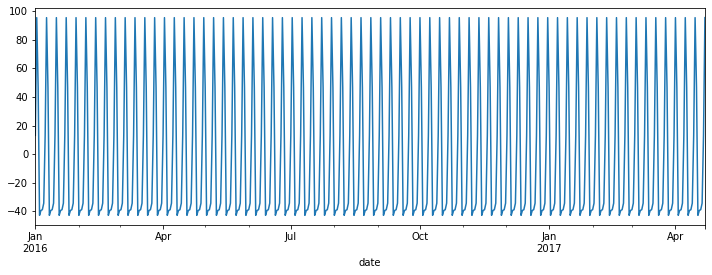

In [158]:
decomp.seasonal.plot(figsize= (12,4))

In [159]:
# Weekly Seasonality can be observed.

### Stationarity Check:

In [160]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller_result(series):
    """
    Function To Perform Augmenter Dickey-Fuller Test and Display Results.
    """
    
    result= adfuller(series.dropna())
    
    labels = ["Test Statistics", "p-Value", "No. of Lags", "No. of Observations"]
    
    output = pd.Series(result[0:4], index= labels)
    
    for key,value in result[4].items():
        output[f"Critical Value {key}"] = value
        
    print(output)
    
    print("\n")
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [161]:
dickey_fuller_result(new_df["total"])

Test Statistics         -5.592497
p-Value                  0.000001
No. of Lags             18.000000
No. of Observations    459.000000
Critical Value 1%       -3.444677
Critical Value 5%       -2.867857
Critical Value 10%      -2.570135
dtype: float64


Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Finding Recommended Orders Using Auto Arima:

In [162]:
grid_arima = auto_arima(new_df["total"], seasonal= True, m= 7, trace= True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=0.43 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=1.09 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=5333.149, Time=0.92 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4816.580, Time=0.70 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=0.34 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4951.804, Time=1.34 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=0.58 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4772.347, Time=0.63 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5

In [163]:
grid_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2382.174
Date:                   Thu, 24 Nov 2022   AIC                           4772.347
Time:                           11:16:22   BIC                           4789.025
Sample:                       01-01-2016   HQIC                          4778.904
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.3703      1.666      2.622      0.009       1.104       7.637
ar.S.L7        0.9659      0.012     78.681      0.000       0.942       0.990
ma.S.L7       -0.7236      0.051    -14.137      0.000      -0.824      -0.623
sigma2      1257.8216     76.628     16.415      0.000    1107.633    1408.010
===================================================================================
Ljung-Box (L1) (Q):                  14.43   Jarque-Bera (JB):                58.58
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.70
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [164]:
# So, (p,d,q)(P,D,Q,m) = (0,0,0)(1,0,1,7)

### Train Test Split:

In [165]:
len(new_df)

478

In [166]:
train_data = new_df[:436]
test_data = new_df[436:]

In [167]:
train_data.shape

(436, 8)

In [168]:
test_data.shape

(42, 8)

### SARIMA(0,0,0)(1,0,1,7) Model:

In [169]:
model = SARIMAX(train_data["total"], order= (0,0,0), seasonal_order= (1,0,1,7))

In [170]:
results = model.fit()

In [171]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Thu, 24 Nov 2022   AIC                           4336.738
Time:                           11:16:22   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.58e-05   1.04e+04      0.000       1.000       1.000
ma.S.L7       -0.9383      0.024    -39.198      0.000      -0.985      -0.891
sigma2      1111.8052     58.738     18.928      0.000     996.680    1226.930
===================================================================================
Ljung-Box (L1) (Q):                  15.40   Jarque-Bera (JB):                83.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [172]:
# Predictions:

start = len(train_data)
end = len(train_data) + len(test_data) -1

preds = results.predict(start= start, end= end, typ= "levels")

In [173]:
preds

2017-03-12    172.104505
2017-03-13     87.860735
2017-03-14     99.908285
2017-03-15     96.840281
2017-03-16     98.639342
2017-03-17    140.727814
2017-03-18    235.750099
2017-03-19    172.087107
2017-03-20     87.851853
2017-03-21     99.898185
2017-03-22     96.830492
2017-03-23     98.629371
2017-03-24    140.713588
2017-03-25    235.726267
2017-03-26    172.069711
2017-03-27     87.842972
2017-03-28     99.888087
2017-03-29     96.820703
2017-03-30     98.619401
2017-03-31    140.699363
2017-04-01    235.702438
2017-04-02    172.052317
2017-04-03     87.834092
2017-04-04     99.877989
2017-04-05     96.810916
2017-04-06     98.609432
2017-04-07    140.685140
2017-04-08    235.678611
2017-04-09    172.034925
2017-04-10     87.825213
2017-04-11     99.867893
2017-04-12     96.801129
2017-04-13     98.599463
2017-04-14    140.670919
2017-04-15    235.654787
2017-04-16    172.017534
2017-04-17     87.816335
2017-04-18     99.857797
2017-04-19     96.791344
2017-04-20     98.589496


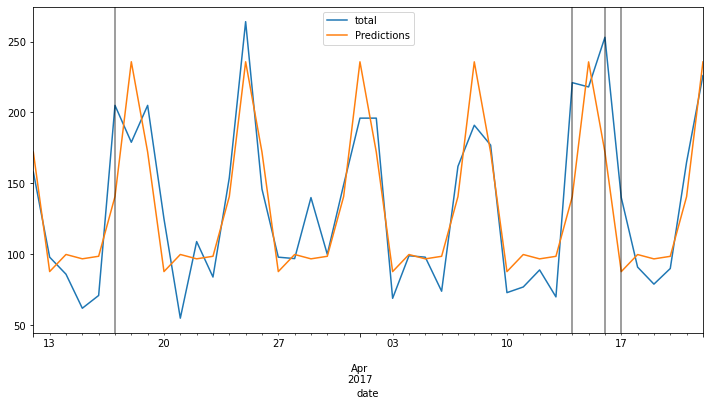

In [174]:
ax = test_data["total"].plot(figsize= (12,6), legend= True)
preds.plot(label= "Predictions", legend= True)

for ind in test_data[test_data["holiday"] == 1].index:
    ax.axvline(x= ind, color= "black", alpha= 0.5)

In [175]:
# Model Evaluation:

np.sqrt(mean_squared_error(test_data["total"], preds))

31.913882348270587

In [176]:
test_data["total"].mean()

134.26190476190476

### SARIMAX:

In [177]:
model = SARIMAX(train_data["total"], exog= train_data[["holiday"]], order= (0,0,0), seasonal_order= (1,0,1,7))

In [178]:
results = model.fit()

In [179]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2098.412
Date:                   Thu, 24 Nov 2022   AIC                           4204.823
Time:                           11:16:23   BIC                           4221.134
Sample:                       01-01-2016   HQIC                          4211.260
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       69.6423      3.968     17.550      0.000      61.865      77.420
ar.S.L7        0.9999   7.57e-05   1.32e+04      0.000       1.000       1.000
ma.S.L7       -0.9429      0.023    -40.396      0.000      -0.989      -0.897
sigma2       813.5453     47.380     17.171      0.000     720.681     906.409
===================================================================================
Ljung-Box (L1) (Q):                  15.58   Jarque-Bera (JB):                20.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.23
Prob(H) (two-sided):                  1.00   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [180]:
# Predictions:

start = len(train_data)
end= len(train_data) + len(test_data) -1

preds = results.predict(start= start, end= end, exog= test_data[["holiday"]])

In [181]:
preds

2017-03-12    166.669653
2017-03-13     76.820270
2017-03-14     95.890801
2017-03-15     96.778328
2017-03-16     93.458325
2017-03-17    207.179857
2017-03-18    230.879650
2017-03-19    166.658411
2017-03-20     76.815089
2017-03-21     95.884333
2017-03-22     96.771800
2017-03-23     93.452022
2017-03-24    137.528312
2017-03-25    230.864077
2017-03-26    166.647170
2017-03-27     76.809908
2017-03-28     95.877866
2017-03-29     96.765273
2017-03-30     93.445718
2017-03-31    137.519036
2017-04-01    230.848505
2017-04-02    166.635930
2017-04-03     76.804727
2017-04-04     95.871399
2017-04-05     96.758746
2017-04-06     93.439415
2017-04-07    137.509760
2017-04-08    230.832935
2017-04-09    166.624690
2017-04-10     76.799546
2017-04-11     95.864932
2017-04-12     96.752220
2017-04-13     93.433113
2017-04-14    207.142753
2017-04-15    230.817365
2017-04-16    236.255720
2017-04-17    146.436635
2017-04-18     95.858466
2017-04-19     96.745694
2017-04-20     93.426811


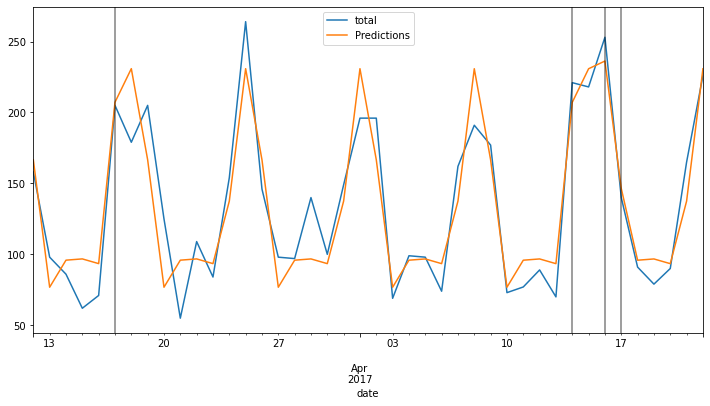

In [182]:
# Plotting Predictions:

ax = test_data["total"].plot(figsize= (12,6), legend= True)
preds.plot(label= "Predictions", legend= True)

for ind in test_data[test_data["holiday"] == 1].index:
    ax.axvline(x= ind, color= "black", alpha= 0.5)

In [183]:
# Model Evaluation:

np.sqrt(mean_squared_error(test_data["total"], preds))

23.21353482125529

### Forecasting Future Data:

In [184]:
# Training Model on Full Data:

final_model = SARIMAX(new_df["total"], exog= new_df[["holiday"]], order= (0,0,0), seasonal_order= (1,0,1,7))

In [185]:
final_results = final_model.fit()

In [187]:
final_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2290.874
Date:                   Thu, 24 Nov 2022   AIC                           4589.748
Time:                           11:19:54   BIC                           4606.427
Sample:                       01-01-2016   HQIC                          4596.305
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       69.9555      3.832     18.258      0.000      62.446      77.465
ar.S.L7        1.0000   4.21e-05   2.38e+04      0.000       1.000       1.000
ma.S.L7       -0.9597      0.021    -45.806      0.000      -1.001      -0.919
sigma2       783.2322     43.762     17.898      0.000     697.461     869.003
===================================================================================
Ljung-Box (L1) (Q):                  12.64   Jarque-Bera (JB):                22.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.22
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [188]:
# We had some Rows with Missing Values for "total" in original data.
# But, it had Values for "holiday".

# We will Use those Values for Future Prediction.

In [189]:
df.tail(40)

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-27,Thursday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-28,Friday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-29,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-30,Sunday,0,na,NaN,NaN,NaN,NaN,NaN


In [190]:
holiday_vals_for_exog = df[478:][["holiday"]]

In [191]:
holiday_vals_for_exog

,holiday
date,
2017-04-23,0
2017-04-24,0
2017-04-25,0
2017-04-26,0
2017-04-27,0
2017-04-28,0
2017-04-29,0
2017-04-30,0
2017-05-01,0


In [192]:
forecast = final_results.predict(start= len(new_df), end= len(new_df)+ 38, exog= holiday_vals_for_exog)

In [193]:
forecast

2017-04-23    170.395908
2017-04-24     79.734437
2017-04-25     92.343409
2017-04-26     96.106481
2017-04-27     91.203448
2017-04-28    141.875263
2017-04-29    225.419374
2017-04-30    170.390331
2017-05-01     79.731827
2017-05-02     92.340387
2017-05-03     96.103335
2017-05-04     91.200463
2017-05-05    211.826169
2017-05-06    225.411996
2017-05-07    170.384754
2017-05-08     79.729218
2017-05-09     92.337364
2017-05-10     96.100190
2017-05-11     91.197478
2017-05-12    141.865976
2017-05-13    225.404618
2017-05-14    240.334726
2017-05-15     79.726608
2017-05-16     92.334342
2017-05-17     96.097044
2017-05-18     91.194493
2017-05-19    141.861333
2017-05-20    225.397240
2017-05-21    170.373600
2017-05-22     79.723999
2017-05-23     92.331320
2017-05-24     96.093899
2017-05-25     91.191508
2017-05-26    141.856690
2017-05-27    225.389863
2017-05-28    170.368024
2017-05-29    149.676938
2017-05-30     92.328298
2017-05-31     96.090754
Freq: D, Name: predicted_

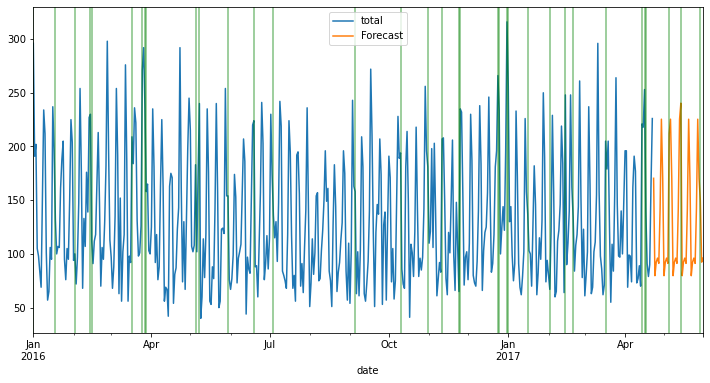

In [197]:
# Plotting Historic Data and Forecast:

ax= new_df["total"].plot(figsize= (12,6), legend= True)
forecast.plot(label= "Forecast", legend= True)

for ind in df[df["holiday"] == 1].index:
    ax.axvline(x= ind, color= "green", alpha= 0.5)